# Data Science Project: Planning Stage - **UBC Minecraft Research Server**

**Students:** Shaurya V. Shastri, Catherine Harris, Jessica Wang                                              
**Date:** 07-12-2025         
**Course:** DSCI100-009

---
GitHub Repository: https://github.com/symkk79/dsci_100_project.git

Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
Specific Question: Can the age of the player predict if the player subscribes to a game-related newsletter in players.csv?

In [3]:
library(tidyverse)
library(purrr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
Players_URL <- "https://raw.githubusercontent.com/symkk79/dsci-100-project-planning-dataset/main/players.csv"
Sessions_URL <- "https://raw.githubusercontent.com/symkk79/dsci-100-project-planning-dataset-1/main/sessions.csv"
players_data <- read_csv(Players_URL)
sessions <- read_csv(Sessions_URL)

#mutate experience to proper value
summary_data <- players |>
    mutate(
    experience = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur"  ~ 2,
    experience == "Regular"  ~ 3,
    experience == "Veteran"  ~ 4,
    experience == "Pro"      ~ 5,
    )
  )

summary_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in eval(expr, envir, enclos): object 'players' not found


In [5]:
summary_data <- players_data |>
                summary(digit = 3) 

summary_data

  experience        subscribe       hashedEmail         played_hours   
 Length:196         Mode :logical   Length:196         Min.   :  0.00  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.00  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.10  
                                                       Mean   :  5.85  
                                                       3rd Qu.:  0.60  
                                                       Max.   :223.10  
                                                                       
     name              gender               Age      
 Length:196         Length:196         Min.   : 9.0  
 Class :character   Class :character   1st Qu.:17.0  
 Mode  :character   Mode  :character   Median :19.0  
                                       Mean   :21.1  
                                       3rd Qu.:22.8  
                                       Max.   :58.0  
                                       NA's   

In [6]:
observation_count <- players_data |>
                    count()
observation_count

n
<int>
196


Data Description:

| Variable   | Type        | Meaning |
| ---------- | ----------- | ------- |
|experience  | categorical | What category of experience the player falls into|
|subscribe   | categorical | Whether or not the player is subscribed to a game-related newsletter|
|hashedEmail | categorical | The email of the player|
|played_hours| quantitative| The amount of hours played| 
|name        | categorical | The name of the player|
|gender      | categorical | The gender of the player|
|Age         | quantitative| The age of the player |

- Number of variables: 8
- Number of observations: 196
- How data was collected: The information is from players on a minecraft server that is being collected as they play.
- Potential issues: Some issues may arise if using the mean because for the variable played_hours the mean and median are very different this means one very large value may be influencing the played_hours mean. 

In [7]:
players_mean <- players_data |>
                select(played_hours, Age) |>
                map_dfr(mean, na.rm = TRUE)
players_mean

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


| Variable     | Mean |
| ------------ | ---- |
| Hours Played | 6    |
| Age          | 21   |

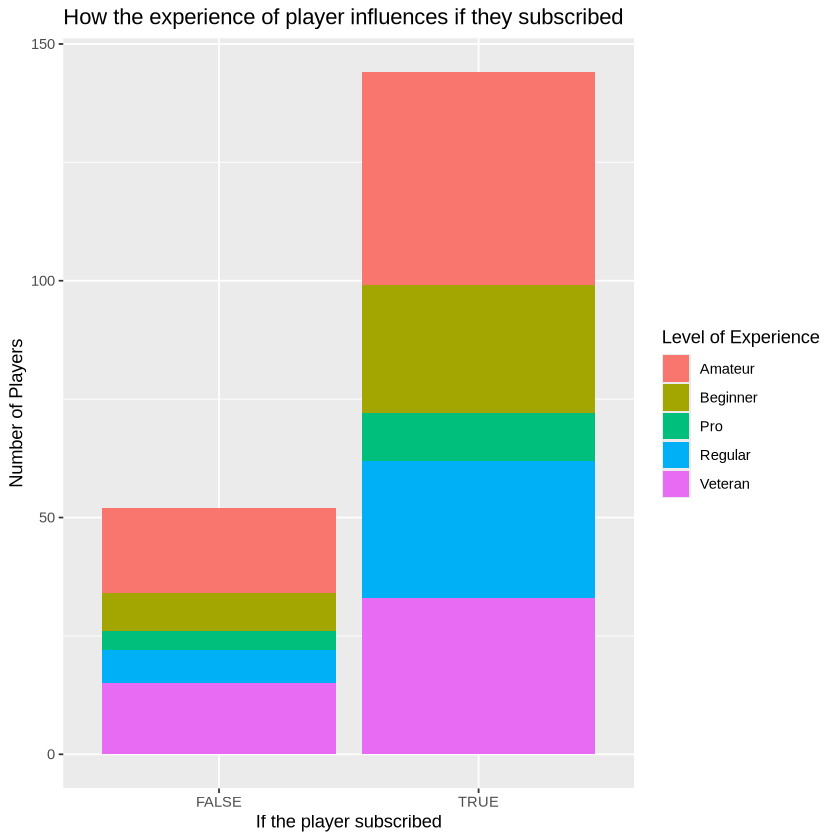

In [8]:
experience_vs_subscription_graph <- players_data |>
                            ggplot(aes(x = subscribe, fill = experience)) +
                            geom_bar() +
                            labs(x = "If the player subscribed", y = "Number of Players", fill = "Level of Experience") +
                            ggtitle("How the experience of player influences if they subscribed")
experience_vs_subscription_graph

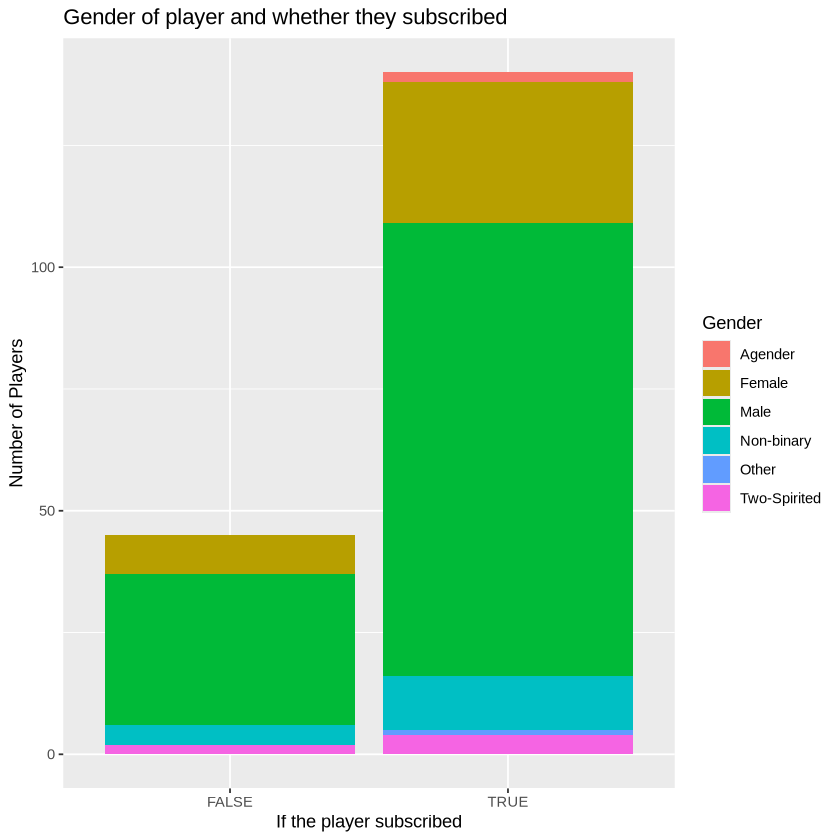

In [9]:
gender_vs_subscription_graph <- players_data |>
                            filter(gender != "Prefer not to say") |>
                            ggplot(aes(x = subscribe, fill = gender)) +
                            geom_bar() +
                            labs(x = "If the player subscribed", y = "Number of Players", fill = "Gender") +
                            ggtitle("Gender of player and whether they subscribed")
gender_vs_subscription_graph

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


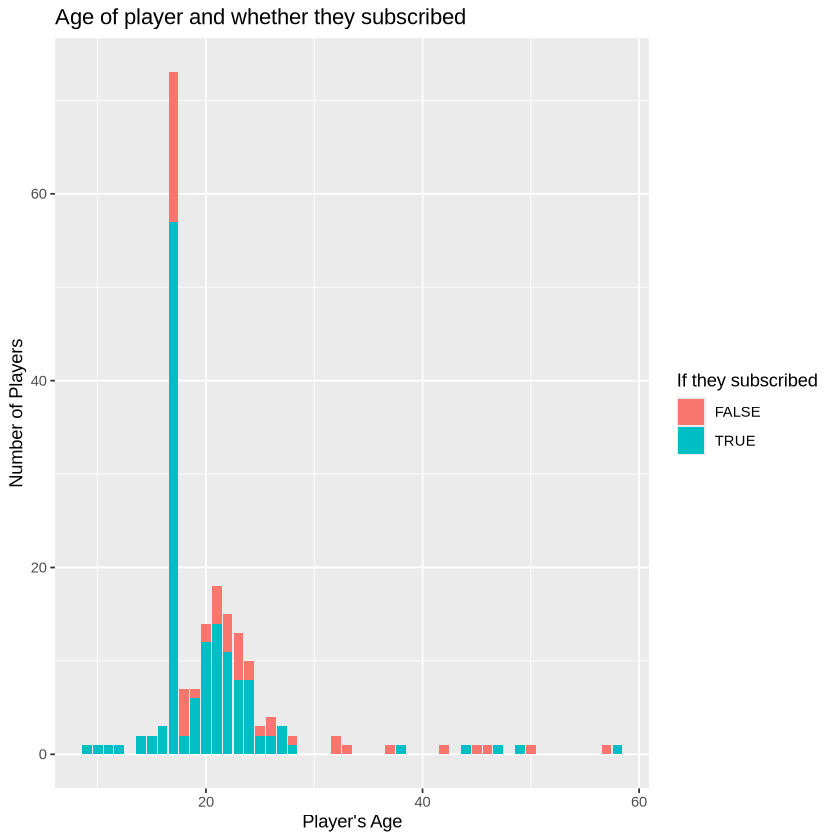

In [10]:
age_vs_subscription_graph <- players_data |>
                            ggplot(aes(x = Age, fill = subscribe)) +
                            geom_bar() +
                            labs(x = "Player's Age", y = "Number of Players", fill = "If they subscribed") +
                            ggtitle("Age of player and whether they subscribed")
age_vs_subscription_graph

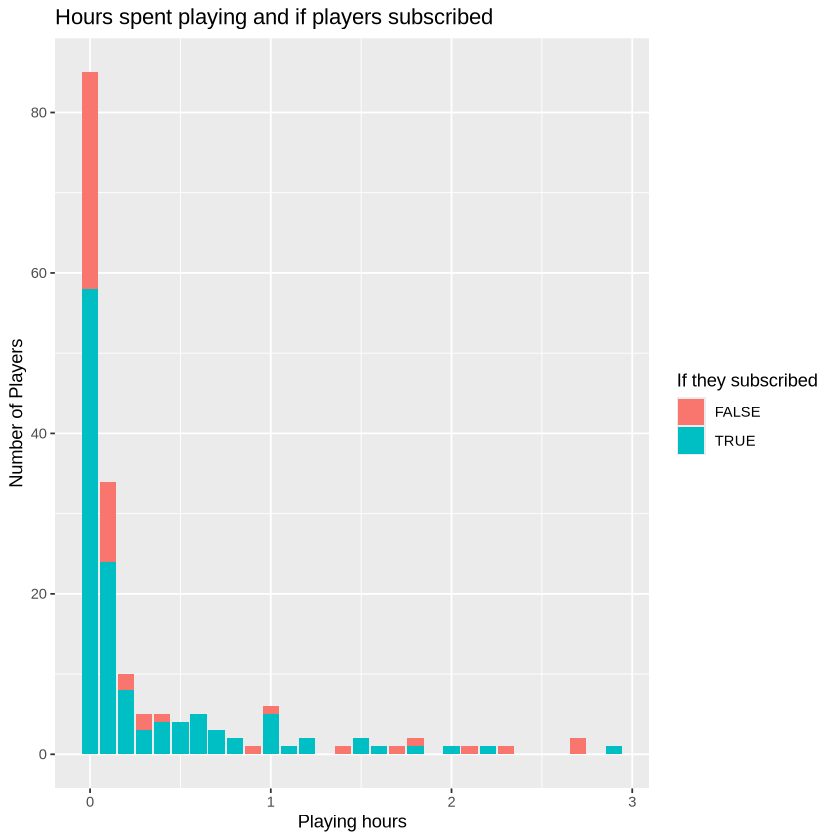

In [11]:
age_vs_subscription_graph <- players_data |>
                            filter(played_hours < 3) |>
                            ggplot(aes(x = played_hours, fill = subscribe)) +
                            geom_bar() +
                            labs(x = "Playing hours", y = "Number of Players", fill = "If they subscribed") +
                            ggtitle("Hours spent playing and if players subscribed")
age_vs_subscription_graph

Insights from the graphs: 

When looking at these graphs it doesn't look like the level of experience of the players, their gender or the hours spent playing had a relationship with whether or not they subscribed. However, there does seem to be a relationship with the age of the player and whether or not they subscribed. It seems as though younger players that are around 15 and younger are more likely to subscribe compared to players over 35. However, it is a weak relationship.

Method and Plan: 

To address my question I would use knn to predict classification. This would work because I am trying to guess which category players fall into, whether they subscribe or not, based on their age. Seeing that subscription is a categorical variable, classification is what is being predicted. The limitations are that this would only look at one variable, ignoring the fact that other variables may also influence the prediction. This also requires the assumption that age can predict whether or not players will subscribe which may be difficult because the graph seems to show a weak relationship between the two. 

To do knn, the data should be split after wrangling but prior to making the model. 75% of the data should go into the training set and the rest into the testing set, ensuring shuffling and stratification happened. After splitting, the training set should be used to build the model. Cross-validation and tuning should also be done to find the best number of neighbours to provide the most accurate predictions that can be achieved. This will also help prevent underfitting or overfitting the model. The data will then be further split and a validation set created. After tuning the optimal k will be inserted and the prediciton will be run.

